In [2]:
# Build a ping percentile plot

import matplotlib.pyplot as plt
from numpy import percentile
from csv import reader
import math

ROOT="/run/media/haxolotl/Backup/GitRoot/libapollo-rust"

In [6]:
f1_shs_d = []
f1_shs_t = []
f1_shs_l = []
f1_apl_d = []
f1_apl_t = []
f1_apl_l = []

f4_shs_d = []
f4_shs_t = []
f4_shs_l = []
f4_apl_d = []
f4_apl_t = []
f4_apl_l = []

f8_shs_d = []
f8_shs_t = []
f8_shs_l = []
f8_apl_d = []
f8_apl_t = []
f8_apl_l = []

f16_shs_d = []
f16_shs_t = []
f16_shs_l = []
f16_apl_d = []
f16_apl_t = []
f16_apl_l = []

Faults=1
Protocol="synchs"
with open(f"{ROOT}/data/Jan14/c5/vary-d/{Faults}-{Protocol}-run-cleaned.csv") as f:
    rdr = reader(f)
    for row in rdr:
        f1_shs_d.append(float(row[0]))
        f1_shs_t.append(float(row[1])/1000)
        f1_shs_l.append(float(row[2]))

Faults=4
with open(f"{ROOT}/data/Jan14/c5/vary-d/{Faults}-{Protocol}-run-cleaned.csv") as f:
    rdr = reader(f)
    for row in rdr:
        f4_shs_d.append(float(row[0]))
        f4_shs_t.append(float(row[1])/1000)
        f4_shs_l.append(float(row[2]))

Faults=8
with open(f"{ROOT}/data/Jan14/c5/vary-d/{Faults}-{Protocol}-run-cleaned.csv") as f:
    rdr = reader(f)
    for row in rdr:
        f8_shs_d.append(float(row[0]))
        f8_shs_t.append(float(row[1])/1000)
        f8_shs_l.append(float(row[2]))

Faults=16
with open(f"{ROOT}/data/Jan14/c5/vary-d/{Faults}-{Protocol}-run-cleaned.csv") as f:
    rdr = reader(f)
    for row in rdr:
        f16_shs_d.append(float(row[0]))
        f16_shs_t.append(float(row[1])/1000)
        f16_shs_l.append(float(row[2]))

Protocol="apollo"
with open(f"{ROOT}/data/Jan14/c5/vary-d/{Faults}-{Protocol}-run-cleaned.csv") as f:
    rdr = reader(f)
    for row in rdr:
        f1_apl_d.append(float(row[0]))
        f1_apl_t.append(float(row[1])/1000)
        f1_apl_l.append(float(row[2]))

Faults=4
with open(f"{ROOT}/data/Jan14/c5/vary-d/{Faults}-{Protocol}-run-cleaned.csv") as f:
    rdr = reader(f)
    for row in rdr:
        f4_apl_d.append(float(row[0]))
        f4_apl_t.append(float(row[1])/1000)
        f4_apl_l.append(float(row[2]))

Faults=8
with open(f"{ROOT}/data/Jan14/c5/vary-d/{Faults}-{Protocol}-run-cleaned.csv") as f:
    rdr = reader(f)
    for row in rdr:
        f8_apl_d.append(float(row[0]))
        f8_apl_t.append(float(row[1])/1000)
        f8_apl_l.append(float(row[2]))

Faults=16
with open(f"{ROOT}/data/Jan14/c5/vary-d/{Faults}-{Protocol}-run-cleaned.csv") as f:
    rdr = reader(f)
    for row in rdr:
        f16_apl_d.append(float(row[0]))
        f16_apl_t.append(float(row[1])/1000)
        f16_apl_l.append(float(row[2]))

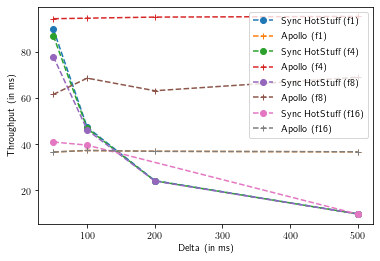

In [7]:
plt.rc('text',usetex=True)

# Throughput vs. D curve
plt.plot(f1_shs_d,f1_shs_t, label="Sync HotStuff (f1)", linestyle='--', marker='o')
plt.plot(f1_apl_d,f1_apl_t, label="Apollo (f1)", linestyle='--', marker='+')

plt.plot(f4_shs_d,f4_shs_t, label="Sync HotStuff (f4)", linestyle='--', marker='o')
plt.plot(f4_apl_d,f4_apl_t, label="Apollo (f4)", linestyle='--', marker='+')

plt.plot(f8_shs_d,f8_shs_t, label="Sync HotStuff (f8)", linestyle='--', marker='o')
plt.plot(f8_apl_d,f8_apl_t, label="Apollo (f8)", linestyle='--', marker='+')

plt.plot(f16_shs_d,f16_shs_t, label="Sync HotStuff (f16)", linestyle='--', marker='o')
plt.plot(f16_apl_d,f16_apl_t, label="Apollo (f16)", linestyle='--', marker='+')

plt.legend()
plt.xlabel("Delta (in ms)")
plt.ylabel("Response Rate (in Kops/s)")
# plt.show()
# plt.xticks(log_points)
plt.savefig("Delta-vs-Tput-for-diff-f.pdf")

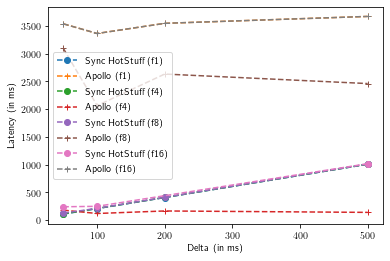

In [8]:
plt.rc('text',usetex=True)

# Latency vs. D curve
plt.plot(f1_shs_d,f1_shs_l, label="Sync HotStuff (f1)", linestyle='--', marker='o')
plt.plot(f1_apl_d,f1_apl_l, label="Apollo (f1)", linestyle='--', marker='+')

plt.plot(f4_shs_d,f4_shs_l, label="Sync HotStuff (f4)", linestyle='--', marker='o')
plt.plot(f4_apl_d,f4_apl_l, label="Apollo (f4)", linestyle='--', marker='+')

plt.plot(f8_shs_d,f8_shs_l, label="Sync HotStuff (f8)", linestyle='--', marker='o')
plt.plot(f8_apl_d,f8_apl_l, label="Apollo (f8)", linestyle='--', marker='+')

plt.plot(f16_shs_d,f16_shs_l, label="Sync HotStuff (f16)", linestyle='--', marker='o')
plt.plot(f16_apl_d,f16_apl_l, label="Apollo (f16)", linestyle='--', marker='+')

plt.legend()
plt.xlabel("Delta (in ms)")
plt.ylabel("Latency (in ms)")
# plt.show()
# plt.xticks(log_points)
plt.savefig("Delta-vs-Lat-for-diff-f.pdf")

In [10]:
F=[1,4,8,16]
shs_t = [f1_shs_t[0], f4_shs_t[0], f8_shs_t[0], f16_shs_t[0]]
apl_t = [f1_apl_t[0], f4_apl_t[0], f8_apl_t[0], f16_apl_t[0]]

shs_l = [f1_shs_l[0], f4_shs_l[0], f8_shs_l[0], f16_shs_l[0]]
apl_l = [f1_apl_l[0], f4_apl_l[0], f8_apl_l[0], f16_apl_l[0]]


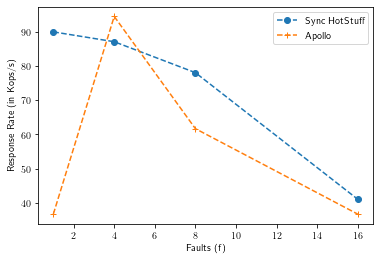

In [11]:
plt.rc('text',usetex=True)

# f vs. Tput curve
plt.plot(F,shs_t, label="Sync HotStuff", linestyle='--', marker='o')
plt.plot(F,apl_t, label="Apollo", linestyle='--', marker='+')

plt.legend()
plt.xlabel("Faults (f)")
plt.ylabel("Response Rate (in Kops/s)")
# plt.show()
# plt.xticks(log_points)
plt.savefig("fault-vs-Tput-for-diff-f.pdf")

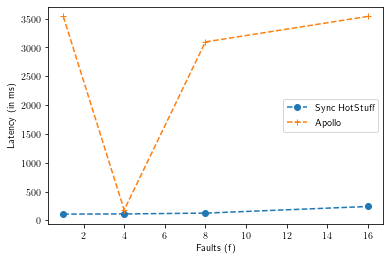

In [12]:
plt.rc('text',usetex=True)

# f vs. Tput curve
plt.plot(F,shs_l, label="Sync HotStuff", linestyle='--', marker='o')
plt.plot(F,apl_l, label="Apollo", linestyle='--', marker='+')

plt.legend()
plt.xlabel("Faults (f)")
plt.ylabel("Latency (in ms)")
# plt.show()
# plt.xticks(log_points)
plt.savefig("fault-vs-Lat-for-diff-f.pdf")